# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 9.999999999999999e-05, E_test is 0.013403000000000002
Average number of iterations is 27.048.


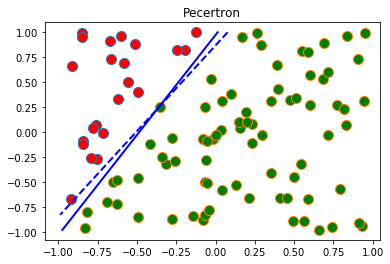

In [9]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of testing data
sumIter = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g, iters = perceptron(xtrain, ytrain)
#     print(i, iters)
    # Compute training, testing error
    pred_y = np.dot(w_g.T, np.vstack((np.ones((1, nTrain + nTest)), X)))
    pred = pred_y * y < 0
    E_train += np.sum(pred[:, :nTrain]) / nTrain
    E_test += np.sum(pred[:, -nTest:]) / nTest
    # Sum up number of iterations
    sumIter += iters
E_train /= nRep
E_test /= nRep
avgIter = sumIter / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(xtrain, ytrain, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.09, E_test is 0.1439


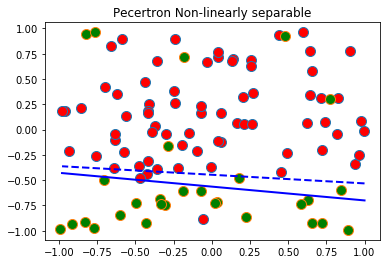

In [17]:
nTrain = 100 # number of training data
nTest = 10000 # number of testing data
E_train = 0
E_test = 0

X, y, w_f = mkdata(nTrain+nTest, 'noisy')

xtrain = X[:, :nTrain]
ytrain = y[:, :nTrain]
xtest = X[:, -nTest:]
ytest = y[:, -nTest:]

w_g, iters = perceptron(xtrain, ytrain)

pred_y = np.dot(w_g.T, np.vstack((np.ones((1, nTrain + nTest)), X)))
pred = pred_y * y < 0
E_train += np.sum(pred[:, :nTrain]) / nTrain
E_test += np.sum(pred[:, -nTest:]) / nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(xtrain, ytrain, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.041029999999999955, E_test is 0.050912000000000075


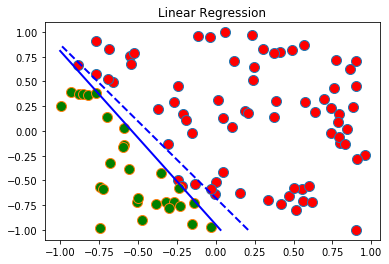

In [18]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 10000  # number of test data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g = linear_regression(xtrain, ytrain)
    # Compute training, testing error
    pred_y = np.dot(w_g.T, np.vstack((np.ones((1, nTrain + nTest)), X)))
    pred = pred_y * y < 0
    E_train += np.sum(pred[:, :nTrain]) / nTrain
    E_test += np.sum(pred[:, -nTest:]) / nTest
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(xtrain, ytrain, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13189000000000012, E_test is 0.14420000000000024


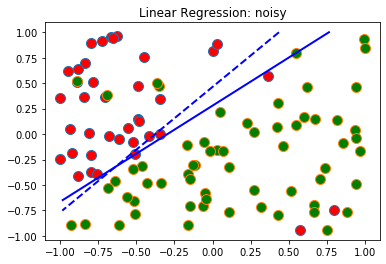

In [19]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = int(nTrain * 1)  # number of test data
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g = linear_regression(xtrain, ytrain)
    # Compute training, testing error
    pred_y = np.dot(w_g.T, np.vstack((np.ones((1, nTrain + nTest)), X)))
    pred = pred_y * y < 0
    E_train += np.sum(pred[:, :nTrain]) / nTrain
    E_test += np.sum(pred[:, -nTest:]) / nTest
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(xtrain, ytrain, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [20]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
# print(X)
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)

# Compute training, testing error
pred_trainy = np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
pred_train = pred_trainy * y < 0
E_train = np.sum(pred_train) / X.shape[1]
pred_testy = np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
pred_test = pred_testy * y_test < 0
E_test = np.sum(pred_test) / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack((X, X[0] * X[1], X[0] * X[0], X[1] * X[1]))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test, X_test[0] * X_test[1], X_test[0] * X_test[0], X_test[1] * X_test[1]))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
pred_trainy = np.dot(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t)))
pred_train = pred_trainy * y < 0
E_train = np.sum(pred_train) / X.shape[1]
pred_testy = np.dot(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t)))
pred_test = pred_testy * y_test < 0
E_test = np.sum(pred_test) / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0027000000000000023, E_test is 0.014600000000000012


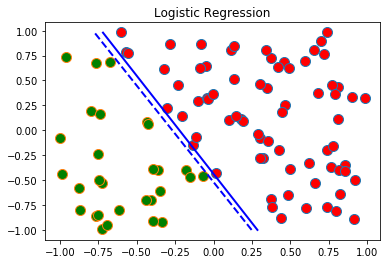

In [21]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = int(nTrain * 1)  # number of test data
E_train = 0
E_test = 0

def sigmiod(z):
    return 1 / (1 + np.exp(-z))

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g = logistic(xtrain, ytrain)
    # Compute training, testing error
    pred = sigmiod(np.dot(w_g.T, np.vstack((np.ones((1, nTest+nTrain)), X))))
    correct_train = 0
    correct_test = 0
    for j in range(nTrain):
        if pred[0, j] < 0.5 and ytrain[0, j] < 0:
            correct_train += 1
        elif pred[0, j] > 0.5 and ytrain[0, j] > 0:
            correct_train += 1
    for j in range(nTest):
        if pred[0, j + nTrain] < 0.5 and ytest[0, j] < 0:
            correct_test += 1
        elif pred[0, j + nTrain] > 0.5 and ytest[0, j] > 0:
            correct_test += 1
    E_train += 1 - correct_train / nTrain
    E_test += 1 - correct_test / nTest
#     print(i, E_train, E_test)

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(xtrain, ytrain, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.11719999999999992, E_test is 0.13048199999999996


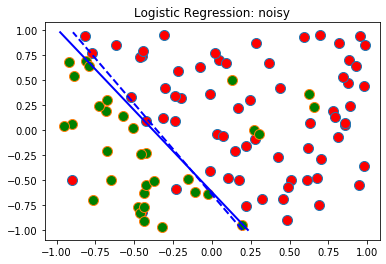

In [24]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data
E_train = 0
E_test = 0

def sigmiod(z):
    return 1 / (1 + np.exp(-z))
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g = logistic(xtrain, ytrain)
    # Compute training, testing error
    pred = sigmiod(np.dot(w_g.T, np.vstack((np.ones((1, nTest+nTrain)), X))))
    correct_train = 0
    correct_test = 0
    for j in range(nTrain):
        if pred[0, j] < 0.5 and ytrain[0, j] < 0:
            correct_train += 1
        elif pred[0, j] > 0.5 and ytrain[0, j] > 0:
            correct_train += 1
    for j in range(nTest):
        if pred[0, j + nTrain] < 0.5 and ytest[0, j] < 0:
            correct_test += 1
        elif pred[0, j + nTrain] > 0.5 and ytest[0, j] > 0:
            correct_test += 1
    E_train += 1 - correct_train / nTrain
    E_test += 1 - correct_test / nTest
#     print(i, E_train, E_test)

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(xtrain, ytrain, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

49 [-7.18982326 -5.90163758 12.06056511] 14
99 [-2.84980919  9.52437302  2.85050365] 7
149 [-5.18105954  4.97724187 10.43317396] 10
199 [-3.76783506  5.78770242 10.64203448] 10
249 [6.71387363 8.4881759  6.90589497] 10
299 [ -1.90311324 -12.65155604   6.76367322] 12
349 [ 0.24404658 -9.94892599  2.9853505 ] 9
399 [-1.53956566  8.07059468  7.49581316] 6
449 [ 4.73599367  2.26834072 12.8882091 ] 11
499 [-6.9641139  -2.84818206 11.27446866] 10
549 [  6.125249   -14.79354235   2.61901309] 15
599 [-5.36670386  3.86066694  8.35903637] 7
649 [-3.10810661 -7.32917572  9.24179804] 7
699 [1.24894776 2.53485902 7.73049306] 8
749 [ 5.13683991 -5.52331314  3.18291997] 7
799 [  9.11752243 -10.14313066  -0.31471402] 13
849 [-1.60013631  8.64240582  6.36684283] 8
899 [-5.41492386  9.24049686  0.62846678] 9
949 [ -4.77657707 -11.8042762    3.28791189] 9
999 [-4.76666228  0.25197907  9.2713088 ] 10
E_train is 0.0027999999999999896, E_test is 0.011397699999999992
Average number of support vectors is 9.67

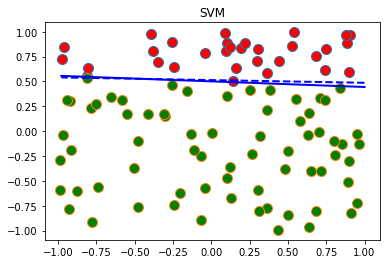

In [30]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data
# nTest = int(nTrain * 1)  # number of test data
E_train = 0
E_test = 0
sumsv = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    xtrain = X[:, :nTrain]
    ytrain = y[:, :nTrain]
    xtest = X[:, -nTest:]
    ytest = y[:, -nTest:]
    w_g, num_sc = svm(xtrain, ytrain)
    if (i+1) % 50 == 0:
        print(i, w_g, num_sc)
    # Compute training, testing error
    pred_y = np.dot(w_g, np.vstack((np.ones((1, nTest+nTrain)), X)))
    correct_train = 0
    correct_test = 0
    pred = pred_y * y < 0
    E_train += np.sum(pred[:, :nTrain]) / nTrain
    E_test += np.sum(pred[:, -nTest:]) / nTest
    # Sum up number of support vectors
    sumsv += num_sc
E_train /= nRep
E_test /= nRep
avgNum = sumsv / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(xtrain, ytrain, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.